# [4.6] 앙상블 (Ensemble) 기법


## 이론


> 여러 개의 분류 모델을 조합해서 더 나은 성능을 내는 방법


앙상블(Ensemble) 기법에는 크게 배깅(Bagging), 부스팅(Boosting) 이렇게 2가지 방식이 있다.



## 배깅(Bagging)


> 한 종류의 분류 모델을 여러 개 만든 후, 서로 다른 학습 Data로 학습시키고 동일한 테스트 Data에 대한 예측값들을 투표해서 가장 높은 예측값으로 결론내리는 기법


배깅(Bagging)은 부트스트랩(Bootstrap)과 어그리게이팅(Aggregating)의 줄임말이다.


배깅은 과대적합이 쉬운 모델에 굉장히 적합한 앙상블 기법이다. 대표적으로 과대적합이 쉬운 '의사결정 트리(Decision Tree)'모델에 많이 사용된다.


### 부트스트랩(Bootstrap)


> Data를 일부러 편향되도록 Sampling하는 기법


과대적합 모델은 학습 Data에 대해서는 높은 정확도를 보여주지만, 그 외의 새로운 Data에 대해서는 낮은 정확도를 보여준다.


부트스트랩(Bootstrap) 기법을 통해서 Data를 Sampling할 때, 편향(bias)을 높여서 과대적합 위험성을 줄이는 것이다.


부트스트랩은 n개의 Data를 k개의 학습 Data로 나눌 때, **중복을 허용**해서 편향을 높이는 방식을 사용한다.


일반적으로 Data의 총 개수인 n개보다 적은 개수의 Data를 할당하게 된다.(일반적으로 전체 Data의 6~70%정도)


예를 들면,


전체 Data : [1, 2, 3, 4, 5]일 때 5개의 학습 Data를 부트스트랩 기법을 사용해서 나누면,


학습 Data 1 : [1, 3, 4]
학습 Data 2 : [1, 2, 5]
학습 Data 3 : [3, 5, 4]
학습 Data 4 : [2, 4, 1]
학습 Data 5 : [1, 4, 5]


이렇게 중복을 허용해서 나누게 되는 것이다.


### 어그리게이팅(Aggregating)


> 여러 분류 모델이 예측한 값을 '투표'를 통해서 하나의 결론으로 도달하는 과정


#### 하드 보팅(Hard Voting)


> 여러 개의 분류 모델에서 나온 결과 중 가장 많이 나온 예측값을 선정하는 것


만약 숫자를 1 ~ 5로 분류하는 의사결정 트리 5개를 학습했다고 하자. 이때 5개의 결과 중 가장 많이 나온 결과로 예측값을 선정하는 것이다.


#### 소프트 보팅(Soft Voting)


> 각 분류값의 확률을 더한 값을 점수로 사용해서 가장 높은 점수를 가지는 분류값을 선정하는 것


k개의 모델이 각 레이블로 분류할 확률을 레이블 별로 합산해서 제일 높은 점수를 가지는 것으로 예측값(레이블)을 선정하는 것이다.


　


### 랜덤 포레스트(Random Forest)


> 여러 개의 의사결정 트리를 배깅해서 예측을 실행하는 모델


의사결정 트리(나무)를 여러개 모아놓았다고 해서 '랜덤 포레스트(Random Forest)'라는 이름이 붙여졌다.


의사결정 트리 기법에서 배깅을 사용한 대표적인 알고리즘이다.

## 부스팅(Boosting)


> 동일한 알고리즘의 분류기를 순차적으로 학습해서 여러 개의 분류기를 만든 후, 테스트 단계에서 가중 투표를 통해 예측값을 결정하는 기법


배깅(Bagging)은 여러 분류기 모델을 병렬적으로 학습시켜서 예측값을 얻어내는 기법이라면,


**부스팅(Boosting)**은 동일한 분류기를 **순차적으로 학습**시켜서 여러 개의 분류기 모델을 만들고, **가중 투표**를 통해 예측값을 얻어내는 기법이다.


### 순차적 학습


말 그대로 '순차적으로' 학습하는 과정을 의미한다.


먼저 첫 번째 분류기를 학습하게 된다. 만약 첫 번째 학습에서 미흡한 부분이 발견되면, 그 부분에 대한 학습 Data를 보강해서 다시 학습시켜 두 번째 분류기를 만든다.


그리고 두 번째 학습의 테스트 결과에 따라서 또 미흡한 부분의 학습 Data를 보강하여 다시 학습을 시켜 세 번째 분류기를 만든다.


이러한 과정을 반복함으로써 여러 개의 분류기를 만들게 되는 것이다.


이 과정을 통해서 부스팅 기법은 동일한 알고리즘을 가지는 여러 개의 분류기를 만들게 되는 것이다.


### 가중 투표


> 더 많은 학습을 거친 분류기에 따라서 높은 가중치를 부여해서 분류값을 선정하는 것


가중 투표에도 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting) 2가지가 있다. 이는 위에서 설명한 하드 보팅, 소프트 보팅과 동일하다. 다만 가중치가 부여될 뿐.


예시를 통해서 알아보도록 하겠다.


예를 들어, 사진을 보고 남자인지 여자인지 분류하는 분류기가 있다고 가정하자


각 분류기가 보여주는 정확도와 분류값이 다음과 같다.


| | 분류기1 | 분류기2 | 분류기3 |
|--------|-----|-----|------|
| 정확도 | 0.4 | 0.5 | 0.95 |
| 분류값 | 남자 | 남자 | 여자 |


먼저 **하드 보팅의 경우** 가중 투표를 진행하면 다음과 같다.


- 남자 = 0.4 + 0.5
- 여자 = 0.95


따라서 분류기 2개가 남자로 분류했음에도 불구하고 최종적인 분류값은 여자로 분류하게 된다.


**소프트 보팅의 경우** 가중 투표를 진행하면 다음과 같다.


| | 분류기1 | 분류기2 | 분류기3 |
|--------|-----|-----|------|
| 분류값 | 남자:0.7, 여자:0.3 | 남자:0.8, 여자:0.2 | 남자:0.1, 여자:0.9 |


- 남자 = 0.4x0.7 + 0.5x0.8 + 0.95x0.1 = 0.775
- 여자 = 0.4x0.3 + 0.5x0.2 + 0.95x0.9 = 1.075
- 즉, (분류기의 정확도) x (분류값으로 분류할 확률)을 각 레이블 별로 모두 더하는 것이다.


　


　



## 예제1) 랜덤 포레스트 손글씨 분류


MNIST 손글씨 데이터셋 이용

In [1]:
# 사용할 모듈 Import하기

from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Data 불러오기

In [2]:
mnist = datasets.load_digits()
features = mnist.data
labels = mnist.target

### 교차 검증

In [3]:
def cross_validation(classifier, features, labels):
    cv_scores = []
    for i in range(10):  # 교차 검증 10번 수행
        scores = cross_val_score(classifier, features, labels, 
                                cv = 10, scoring = 'accuracy')
        cv_scores.append(scores.mean())
    return cv_scores

In [4]:
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(),
                               features, labels)

In [5]:
rf_cv_scores = cross_validation(RandomForestClassifier(),
                               features, labels)

In [6]:
### 랜덤 포레트스 vs 의사결정 트리의 정확도 시각화

<AxesSubplot:>

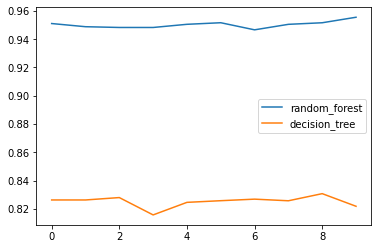

In [7]:
cv_list = [
    ['random_forest', rf_cv_scores],
    ['decision_tree', dt_cv_scores]
]

df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

In [8]:
np.mean(dt_cv_scores)

0.8252430167597765

In [9]:
np.mean(rf_cv_scores)

0.9502420856610799

## 예제2) 보팅 앙상블 손글씨 분류

In [10]:
# 사용할 모듈 Import하기

from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
mnist = datasets.load_digits()
features = mnist.data
labels = mnist.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2)

### 단일 모델의 정확도 측정


앙상블 기법을 사용하기 전, 개별 모델(의사결정 트리, kNN, SVM)들 각각의 정확도를 측정해보았다.

In [12]:
# 의사결정 트리 모델

dtree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 8,
                                   max_features = 32, random_state = 35)
dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)


# kNN 모델

knn = KNeighborsClassifier(n_neighbors = 299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)


# SVM 모델

svm = SVC(C = 0.1, gamma = 0.003, probability = True, random_state = 35).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)


# 정확도 출력

print('[ Accuracy ]')
print('d-tree : {}'.format(accuracy_score(y_test, dtree_predicted)))
print('knn : {}'.format(accuracy_score(y_test, knn_predicted)))
print('svm : {}'.format(accuracy_score(y_test, svm_predicted)))

[ Accuracy ]
d-tree : 0.7916666666666666
knn : 0.8416666666666667
svm : 0.9333333333333333


### 분류값별 확률 확인

In [13]:
svm_proba = svm.predict_proba(X_test)
print(len(svm_proba))
print(svm_proba[0:2])
# print(svm_proba[0].sum())

360
[[6.41560962e-04 2.54455579e-04 3.38139172e-04 1.30236912e-03
  2.42455584e-04 4.19438691e-03 9.47272363e-05 1.69346686e-04
  9.52203474e-04 9.91810355e-01]
 [7.14790085e-04 1.14413089e-03 9.80044946e-01 3.66871386e-03
  1.68992545e-03 3.72483364e-03 4.34067688e-04 9.24115362e-04
  5.24511770e-03 2.40935932e-03]]


### 하드 보팅

In [14]:
voting_clf = VotingClassifier(estimators = [
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
                             weights = [1, 1, 1], voting = 'hard').fit(X_train, y_train)

hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.9194444444444444

### 소프트 보팅

In [15]:
voting_clf = VotingClassifier(estimators = [
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
                             weights = [1, 1, 1], voting = 'soft').fit(X_train, y_train)

soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.9083333333333333

### 단일 모델과 앙상블 모델의 정확도 비교 시각화

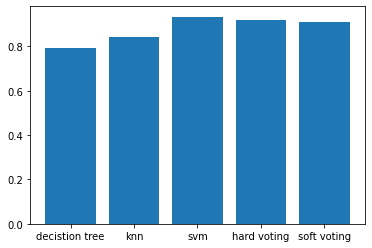

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


x = np.arange(5)

height_lists = [
    dtree_predicted,
    knn_predicted,
    svm_predicted,
    hard_voting_predicted,
    soft_voting_predicted
]

heights = []
for height_list in height_lists:
    heights.append(accuracy_score(y_test, height_list))

plt.bar(x, height = heights)
plt.xticks(x, ['decistion tree', 'knn', 'svm', 'hard voting', 'soft voting'])
plt.show()